In [18]:
import pandas as pd
import quandl as qd
import numpy as np
import html5lib 
import bs4
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import mpld3  #This is to make graph interactive
mpld3.enable_notebook()
# %matplotlib inline



In [3]:
api_key = open("api_key_quandl.txt", "r").read()



In [3]:
def state_list():
    fiddy_states = pd.read_html("https://simple.wikipedia.org/wiki/List_of_U.S._states")
    np_fiddy_states = np.array(fiddy_states[0]) 
    return np_fiddy_states[1:,1]    

def grab_initial_state_data():
    main_df = pd.DataFrame()
    for abv in state_list():
        query = "FMAC/HPI_" + abv
        df = qd.get(query, authtoken = api_key)
        df.rename(columns = {"Value":abv}, inplace = True) #If you remove this line an error will occur you can check that out
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df)
            # This is pyhton way of pickling
#     pickle_out = open("fiddy_states.pickle", "wb")
#     pickle.dump(main_df, pickle_out)
#     pickle_out.close()
            # This is pandas way of pickling  
#       main_df.to_pickle('pickle.pickle')  
grab_initial_state_data()



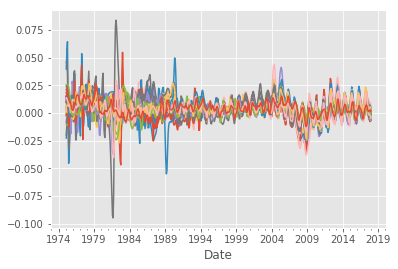

In [4]:
HPI_data = pd.read_pickle('pickle.pickle')
HPI_data.pct_change().plot()
plt.legend().remove()

#### In the above graph the percent change is measured from any aribitary value so we will tweak the code so that it is measured from the starting value

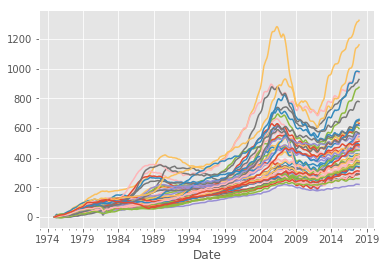

In [5]:
HPI_data = pd.read_pickle('pickle.pickle')
def percent_change_from_start():
    HPI_pct_change_data = pd.DataFrame()
    for abv in HPI_data:
        # substracting some number from a DataFrame leads to substracting that number from each element of the DataFrame
        HPI_pct_change_data[abv] = ((HPI_data[abv] - HPI_data[abv][0]) * 100)/ HPI_data[abv][0]
    return HPI_pct_change_data
HPI_pct_change_data = percent_change_from_start()
HPI_pct_change_data.to_pickle('fiddy_states3.pickle')

HPI_pct_change_data = pd.read_pickle('fiddy_states3.pickle')
HPI_pct_change_data.plot()
plt.legend().remove()

### Now we will benchmark it against USA HPI



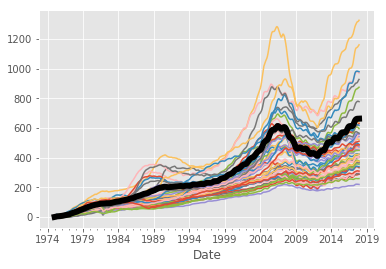

In [6]:
def HPI_benchmark():
    benchmark = qd.get("FMAC/HPI_USA", authtoken = api_key)
    benchmark['Value'] = ((benchmark['Value'] - benchmark['Value'][0]) * 100) / benchmark['Value'][0]
    return benchmark

benchmark = HPI_benchmark()
benchmark.head(10)

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))
HPI_pct_change_data = pd.read_pickle('fiddy_states3.pickle')
HPI_pct_change_data.plot(ax = ax1)

benchmark = HPI_benchmark()
benchmark.plot(ax = ax1, color = 'k', linewidth = 6)

plt.legend().remove()

In [7]:
HPI_pct_change_data = pd.read_pickle('fiddy_states3.pickle')
# print(HPI_pct_change_data)
HPI_correlation =  HPI_pct_change_data.corr()
HPI_correlation.describe()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.969991,0.943373,0.937553,0.972036,0.949229,0.950724,0.926624,0.961880,0.934780,0.956292,...,0.961394,0.970763,0.932500,0.957874,0.963450,0.967426,0.966459,0.964914,0.965543,0.942940
std,0.025274,0.039552,0.025360,0.025128,0.022249,0.030373,0.041004,0.028662,0.028335,0.024734,...,0.033909,0.025022,0.040287,0.031079,0.029375,0.025038,0.023427,0.030770,0.025057,0.041471
min,0.882021,0.789730,0.862478,0.872360,0.879030,0.850228,0.814481,0.872770,0.852304,0.866715,...,0.827538,0.869478,0.807780,0.861735,0.850858,0.857898,0.877117,0.843745,0.887492,0.786434
25%,0.956579,0.931467,0.924449,0.967509,0.937869,0.936448,0.899831,0.951011,0.918622,0.947554,...,0.950505,0.960841,0.916007,0.944165,0.957592,0.961654,0.959105,0.955688,0.957423,0.926764
50%,0.977651,0.953094,0.939571,0.979016,0.948102,0.957346,0.930490,0.966621,0.933555,0.958870,...,0.972498,0.977039,0.937210,0.965548,0.971401,0.973892,0.972712,0.975842,0.970498,0.954474
75%,0.985823,0.964784,0.947962,0.989650,0.963391,0.971992,0.957771,0.980288,0.951685,0.973170,...,0.982684,0.987861,0.960878,0.980720,0.980462,0.979199,0.979112,0.983817,0.985101,0.966719
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# HPI_pct_change_data['AL']

#### Resampling for 1 year

In [9]:
AL1yr =  HPI_pct_change_data['AL'].resample('A').mean()

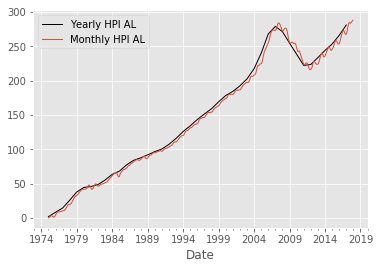

In [10]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))
AL1yr.plot(ax = ax1, color ='k', label = "Yearly HPI AL", linewidth = 1)
HPI_pct_change_data['AL'].plot(ax = ax1, label = "Monthly HPI AL", linewidth = 1)
plt.legend()

In [11]:
HPI_pct_change_data['AL1yr'] =  HPI_pct_change_data['AL'].resample('A').mean()
print(HPI_pct_change_data['AL1yr'].head(20))

Date
1975-01-31         NaN
1975-02-28         NaN
1975-03-31         NaN
1975-04-30         NaN
1975-05-31         NaN
1975-06-30         NaN
1975-07-31         NaN
1975-08-31         NaN
1975-09-30         NaN
1975-10-31         NaN
1975-11-30         NaN
1975-12-31    1.823875
1976-01-31         NaN
1976-02-29         NaN
1976-03-31         NaN
1976-04-30         NaN
1976-05-31         NaN
1976-06-30         NaN
1976-07-31         NaN
1976-08-31         NaN
Name: AL1yr, dtype: float64


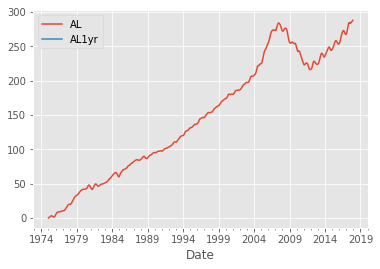

In [19]:
%matplotlib inline
HPI_pct_change_data[['AL', 'AL1yr']].plot()
plt.legend()